In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 회귀
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 여기까지 ver.1 표준
from sklearn.ensemble import RandomForestRegressor # ver.2
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder #ocean_proximuty # ver.2

In [2]:
df = pd.read_csv("data/housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# NA > median 채우기
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [4]:
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# 데이터 나누기

In [5]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## 모델 생성

In [7]:
# Baseline
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [8]:
r2 = r2_score(y_test, lr_pred)
r2

0.613706888649955

In [9]:
r2 = r2_score(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
(r2, rmse)

(0.613706888649955, 71147.87146118362)

In [10]:
df['median_house_value'].mean()

206855.81690891474

In [11]:
# 개선 알고리즘
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [12]:
r2 = r2_score(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
(r2, rmse)

(0.8111586657902146, 49745.289205259745)

In [13]:
# 49689 / 71133 # LabelEncoder 하기 전 계산 / 30% 좋아졌다?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr


In [15]:
kospi = fdr.DataReader('KS11')
kospi['Change'] = kospi['Change'] * 100
kospi = kospi.drop(["Open", "High", "Low", "Close", "Volume", "UpDown", "Comp", "Amount", "MarCap"], axis=1)

kospi.rename(columns={"Change": "KOSPI"}, inplace=True)
kospi.head(), kospi.tail()

(            KOSPI
 Date             
 2001-06-11  -2.18
 2001-06-12  -0.18
 2001-06-13   1.14
 2001-06-14  -0.05
 2001-06-15   0.85,
             KOSPI
 Date             
 2024-05-02  -0.31
 2024-05-03  -0.26
 2024-05-07   2.16
 2024-05-08   0.39
 2024-05-09  -0.67)

In [16]:
nasdaq = fdr.DataReader("IXIC", "2001-06-08")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq = nasdaq.drop("2001-06-08", axis=0)
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq

,NASDAQ
Date,
2001-06-11,-2.00
2001-06-12,-0.04
2001-06-13,-2.23
2001-06-14,-3.66
2001-06-15,-0.77
...,...
2024-05-02,1.51
2024-05-03,1.99
2024-05-06,1.19


In [17]:
nasdaq.tail()

,NASDAQ
Date,
2024-05-02,1.51
2024-05-03,1.99
2024-05-06,1.19
2024-05-07,-0.10
2024-05-08,-0.18


In [18]:
sap = fdr.DataReader("S&P500", "2001-06-08")
sap["Change"] = round(sap["Adj Close"].pct_change() * 100, 2)
sap = sap.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
sap = sap.drop("2001-06-08", axis=0)
sap.rename(columns={"Change": "S&P"}, inplace=True)
sap.head()

,S&P
Date,
2001-06-11,-0.84
2001-06-12,0.12
2001-06-13,-1.13
2001-06-14,-1.75
2001-06-15,-0.45


In [19]:
sap.tail()

,S&P
Date,
2024-05-02,0.91
2024-05-03,1.26
2024-05-06,1.03
2024-05-07,0.13
2024-05-08,-0.00


In [20]:
usa_treasury = fdr.DataReader("US10YT", "2001-06-08")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.drop("2001-06-08", axis=0)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_12864\2967678365.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2001-06-11,-0.86
2001-06-12,-0.89
2001-06-13,0.32
2001-06-14,-0.80
2001-06-15,0.25
...,...
2024-05-02,-0.52
2024-05-03,-1.55
2024-05-06,-0.24


In [21]:
usa_treasury.tail()

,USA_TREASURY
Date,
2024-05-02,-0.52
2024-05-03,-1.55
2024-05-06,-0.24
2024-05-07,-0.58
2024-05-08,0.65


In [22]:
japan = fdr.DataReader("N225", "2001-06-08")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan = japan.drop("2001-06-08", axis=0)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
japan

C:\Users\user\AppData\Local\Temp\ipykernel_12864\1919354611.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
2001-06-15,-0.44
...,...
2024-05-01,-0.34
2024-05-02,-0.10
2024-05-07,1.57


In [23]:
japan.tail()

,Nikkei
Date,
2024-05-01,-0.34
2024-05-02,-0.10
2024-05-07,1.57
2024-05-08,-1.63
2024-05-09,0.50


In [24]:
usd_krw = fdr.DataReader("USD/KRW", "2001-06-08", "2024-05-03")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_12864\1038435298.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2003-12-01,NaN
2003-12-02,-0.28
2003-12-03,-0.21
2003-12-04,-0.20
2003-12-05,-0.45
...,...
2024-04-26,-0.38
2024-04-29,0.39
2024-04-30,-0.18


In [25]:
usd_krw.tail()

,USD/KRW
Date,
2024-04-26,-0.38
2024-04-29,0.39
2024-04-30,-0.18
2024-05-01,0.79
2024-05-02,-0.75


In [26]:
result_data = pd.concat([kospi, nasdaq, sap, usd_krw, usa_treasury, japan], axis=1)
result_data.fillna(result_data.mean(), inplace=True) #나라마다 공휴일이 달라서 평균값으로 채워
result_data = round(result_data, 2)

In [27]:
result_data.info() # result_data.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5979 entries, 2001-06-11 to 2024-05-09
Freq: B
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KOSPI         5979 non-null   float64
 1   NASDAQ        5979 non-null   float64
 2   S&P           5979 non-null   float64
 3   USD/KRW       5979 non-null   float64
 4   USA_TREASURY  5979 non-null   float64
 5   Nikkei        5979 non-null   float64
dtypes: float64(6)
memory usage: 327.0 KB


In [28]:
result_data.to_csv("./data/kospi_result_data.csv") #전처리 끝낸 데이터

## 데이터 분리

In [29]:
X = result_data[["NASDAQ", "S&P", "USD/KRW", "USA_TREASURY", "Nikkei"]]
y = result_data["KOSPI"]

## Kmeans을 사용해서 평균 구하자

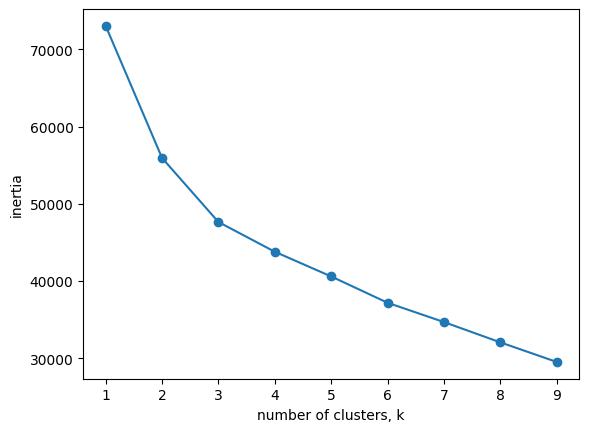

In [30]:
from sklearn.cluster import KMeans

ks = range(1, 10)

inertias = [] # 파이썬 표준 규격

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

In [31]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # 3이 안 될 수도 있어서 변수화
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([0, 0, 2, 0, 0, 0, 0, 0, 2])

## t-SNE을 통한 데이터 확인

In [32]:
# 수익률이 높은 걸 알고 싶은데 보고 싶은 결과를 내가 정해야
from sklearn.manifold import TSNE

In [33]:
t_sne = X.shape[0]
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(X)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 5979 samples in 0.007s...
[t-SNE] Computed neighbors for 5979 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5979
[t-SNE] Computed conditional probabilities for sample 2000 / 5979
[t-SNE] Computed conditional probabilities for sample 3000 / 5979
[t-SNE] Computed conditional probabilities for sample 4000 / 5979
[t-SNE] Computed conditional probabilities for sample 5000 / 5979
[t-SNE] Computed conditional probabilities for sample 5979 / 5979
[t-SNE] Mean sigma: 0.049178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.159355
[t-SNE] KL divergence after 1000 iterations: 1.441826


In [34]:
tsne_result

array([[-28.466465 ,  68.017075 ],
       [-36.591587 ,  37.080746 ],
       [ -3.135709 ,  83.93811  ],
       ...,
       [-26.32279  , -53.24252  ],
       [ 13.178445 ,  72.89649  ],
       [ -4.2164288,  -8.026211 ]], dtype=float32)

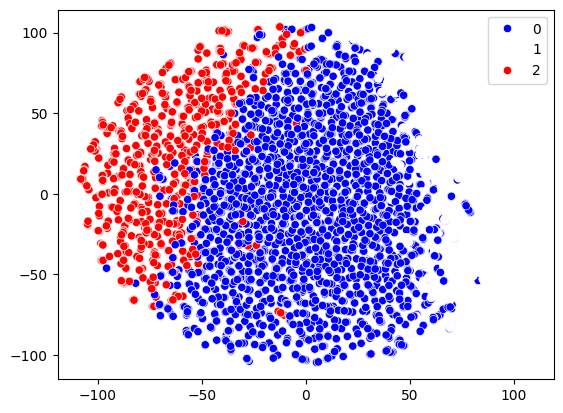

In [35]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_kmeans, s=20, cmap="bwr")
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y_kmeans, palette="bwr")
plt.show()

In [36]:
df1 = result_data.copy()
df1["cluster"] = y_kmeans
df1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,2
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,0
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,0
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,2
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,0
...,...,...,...,...,...,...,...
2024-05-03,-0.26,1.99,1.26,0.01,-1.55,0.03,0
2024-05-06,0.03,1.19,1.03,0.01,-0.24,0.03,0
2024-05-07,2.16,-0.10,0.13,0.01,-0.58,1.57,0


In [37]:
## 군집 0 ~ 3 까지 분류된거를 변수명에 추가
cluster_2 = df1[df1["cluster"] == 2]
cluster_1 = df1[df1["cluster"] == 1]
cluster_0 = df1[df1["cluster"] == 0]

In [38]:
cluster_total = df1.groupby("cluster").mean()
cluster_total["return"] = cluster_total.T.mean() # 이득
cluster_total["std"] = cluster_total.T.std() # 손실
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2
KOSPI,0.102151,0.308979,-0.396364
NASDAQ,0.312940,0.707193,-1.315430
S&P,0.251996,0.633229,-1.131924
USD/KRW,-0.014461,-0.021207,0.094464
USA_TREASURY,-0.061448,3.423641,-2.511347
Nikkei,0.099713,0.373994,-0.472135
return,0.115148,0.904305,-0.955456
std,0.133067,1.151203,0.839646


In [39]:
cluster_total.describe()

cluster,0,1,2
count,8.000000,8.000000,8.000000
mean,0.117388,0.935167,-0.731068
std,0.123359,1.069375,1.003539
min,-0.061448,-0.021207,-2.511347
25%,0.071170,0.357740,-1.177800
50%,0.108650,0.670211,-0.713795
75%,0.162799,0.966029,-0.273657
max,0.312940,3.423641,0.839646


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwarg

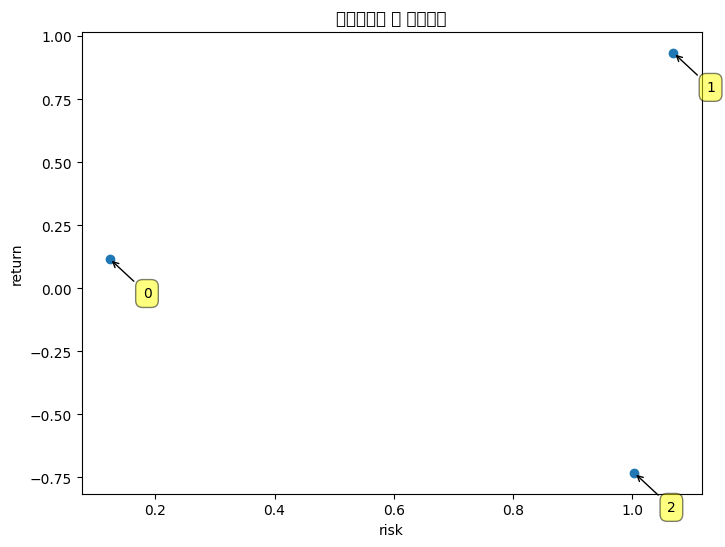

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_total.std(), cluster_total.mean())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("평균수익률 및 표준편차")
for label, x, y in zip(
    cluster_total.columns, cluster_total.std(), cluster_total.mean()
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )